# task4

1. 了解ajax加载
2. 通过chrome的开发者工具，监控网络请求，并分析
3. 用selenium完成爬虫
4. 具体流程如下：
<br>用selenium爬取https://news.qq.com/ 的热点精选
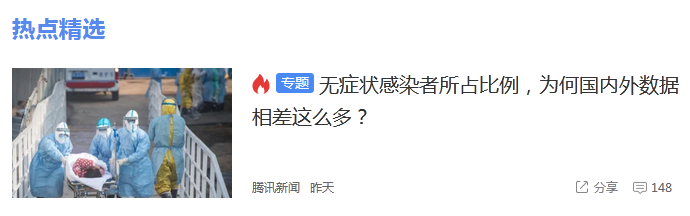
热点精选至少爬50个出来，存储成csv
每一行如下
标号（从1开始）,标题,链接,...（前三个为必做，后面内容可以自己加）
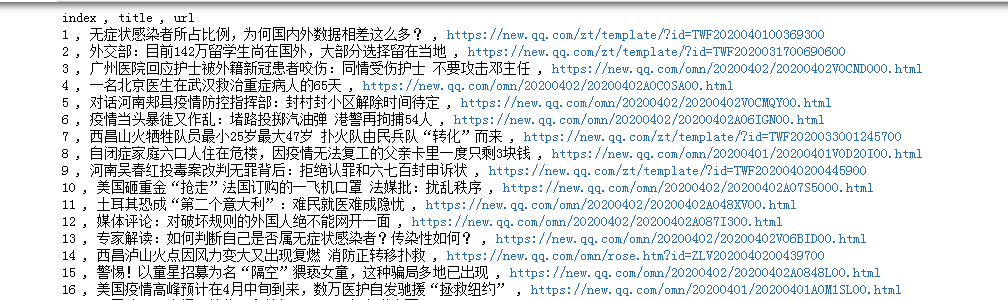


In [2]:
import time
from  selenium import webdriver
driver=webdriver.Chrome(executable_path="D:\software\Google\Chrome\Application\chromedriver.exe")
driver.get("https://news.qq.com")
#了解ajax加载
for i in range(1,100):
    time.sleep(2)
    driver.execute_script("window.scrollTo(window.scrollX, %d);"%(i*200))

In [3]:
from bs4 import BeautifulSoup
html=driver.page_source
bsObj=BeautifulSoup(html,"lxml")

In [4]:
jxtits=bsObj.find_all("div",{"class":"jx-tit"})[0].find_next_sibling().find_all("li")

In [5]:
print("index",",","title",",","url")
for i,jxtit in enumerate(jxtits):
#     print(jxtit)
    
    try:
        text=jxtit.find_all("img")[0]["alt"]
    except:
        text=jxtit.find_all("div",{"class":"lazyload-placeholder"})[0].text
    try:
        url=jxtit.find_all("a")[0]["href"]
    except:
        print(jxtit)
    print(i+1,",",text,",",url) 


index , title , url
1 , 中国疾控中心专家：各国都在追踪本地零号病人，但存在两个难点 , https://new.qq.com/omn/20200427/20200427A0O4I700.html
2 , 神州优车谈瑞幸事件影响：已现金融机构和供应商挤兑苗头 , https://new.qq.com/zt/template/?id=FIN2020040201203200
3 , 网传南京护士独自支援武汉无任何优待 当事人：有获得补助和证书 , https://new.qq.com/omn/20200427/20200427A0OXM900.html
4 , 港口大拦截10万船员不能下船，工作人员：领导怕出现疫情乌纱帽不保 , https://new.qq.com/omn/20200427/20200427A0MRLF00.html
5 , 英国首相鲍里斯病后首次现身唐宁街发声明 当场双拳紧握说了这话 , https://new.qq.com/omn/20200427/20200427V0JGKW00.html
6 , 北方今起持续大升温：华北黄淮最明显，北京五一最高温或超35℃ , https://new.qq.com/omn/20200427/20200427A0KDBT00.html
7 , 学生五一能出去玩吗？景区如何防控？北京这场发布会都说清了 , https://new.qq.com/zt/template/?id=SSH2020042600556500
8 , 保安讲述河北四口被杀案嫌犯抓捕细节：他躲在植物园抽烟 被民警认出 , https://new.qq.com/omn/20200427/20200427V0OLNP00.html
9 , 现场直击 | 原油宝事件后续：中国银行总部“严阵以待” , https://new.qq.com/zt/template/?id=FIN2020042200316800
10 , 钱端事件新进展：深圳银保监局认定招行存在多处违规 , https://new.qq.com/omn/20200427/20200427A0ND6N00.html
11 , 泰国杀妻骗保案凶手放弃上诉入监服刑 死者家属已上诉请求改判死刑 , https://new.qq.com/omn/20200427/2020042

# 进阶加餐-知乎爬虫

链接如下
<br>https://www.zhihu.com/search?q=Datawhale&utm_content=search_history&type=content
<br>用requests库实现，不能用selenium网页自动化
<br>提示：
<br>该链接需要登录，可通过github等，搜索知乎登录的代码实现，并理解其中的逻辑，此任务允许复制粘贴代码
<br>与上面ajax加载类似，这次的ajax加载需要用requests完成爬取，最终存储样式随意，但是通过Chrome的开发者工具，分析出ajax的流程需要写出来
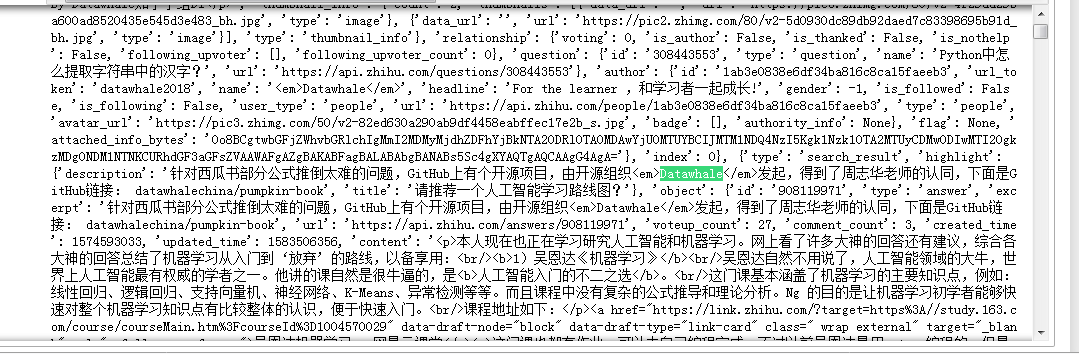

**在zhihu_login_master的文件夹下运行zhihu_login.py文件**<br>
**然后会得到一个cookies.txt，复制到此目录下即可运行下列代码**<br>
https://github.com/zkqiang/Zhihu-Login 我使用的代码在此，他的README.md里有详细解析

In [6]:
import requests
from http import cookiejar
Session=requests.session()
Session.cookies = cookiejar.LWPCookieJar(filename='./cookies.txt')
Session.cookies.load(ignore_discard=True)
Session.headers={
            'Host': 'www.zhihu.com',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
                          '(KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'
        }
r=Session.get("https://www.zhihu.com/search?q=Datawhale&utm_content=search_history&type=content")
r.encoding="utf-8"

FileNotFoundError: [Errno 2] No such file or directory: './cookies.txt'

In [ ]:
from bs4 import BeautifulSoup
import re
compiler=re.compile('"next":"(https:\\\\u002F\\\\u002Fapi.zhihu.com\\\\u002Fsearch_v3.*?)"')
r.text

In [ ]:
bsObj=BeautifulSoup(r.text,"lxml")
url=compiler.findall(r.text)[0]

In [ ]:
from urllib.parse import unquote
url=unquote(url,encoding="utf-8", errors='replace')
url=url.replace("\\u002F","/")
search_hash_id=re.search("search_hash_id=(.*?)&show_all_topics",url).group(1)
search_hash_id

In [ ]:
offset=20
lc_idx=21
for i in range(5):
    r=Session.get("https://www.zhihu.com/api/v4/search_v3?t=general&q=Datawhale&correction=1&offset={offset}&limit=20&lc_idx={lc_idx}&show_all_topics=0&search_hash_id={search_hash_id}&vertical_info=0%2C0%2C1%2C0%2C0%2C0%2C0%2C0%2C0%2C0".format(**{"offset":offset+i*20,"lc_idx":lc_idx+i*20,"search_hash_id":search_hash_id}))
    r.encoding="utf-8"
    print(r.json())
    print("\n"*20)
